In [28]:
#APPROACH USED 
#################################
#BASIC CNN WITH DATA CONSTRAINT 
#################################
#EARLIER CASE WE USED 
                     #TRAINING SET (8000 IMAGE ) 4000 CAT 4000 DOG IMAGE 
                     #TEST SET     (2000 IMAGE) 1000 CAT  1000 DOG IMAGE 
#IN THIS APPROACH WE WILL USE 
                    #TRAINING SET (3000 IMAGE ) 1500 CAT 1500 DOG IMAGE 
                    #TEST SET     (1000 IMAGE) 500 CAT  500 DOG IMAGE

#3 APPROACHES WE WILL FOLLOW 
                    #TRANSFER LEARNING 
                    #VGG16 PRETRAINED 
                    #VGG16 FINETUNING 
                    

In [29]:
#####################################################################
#FIRST APPROACH 
 #VGG16 Pre-trained CNN model as a Feature Extractor with out data augmentation ****************
 #TRAINING ACCURACY :1.00
 #VALIDATION ACCURACY:0.89  
 #CONCLUSION: OVERFITTED 
#####################################################################

In [30]:
#Mount Google drive
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
from zipfile import ZipFile
file_name = "/content/drive/My Drive/Colab Notebooks/dataset_cat_dog.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print("unzipping completed")

unzipping completed


In [32]:
import glob
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img

%matplotlib inline

IMG_DIM = (150, 150)
#As we want         #TRAINING SET (3000 IMAGE ) 1500 CAT 1500 DOG IMAGE 
                    #TEST SET     (1000 IMAGE) 500 CAT  500 DOG IMAGE

cat_train_files = glob.glob('/content/dataset/training_set/cats/*')
dog_train_files = glob.glob('/content/dataset/training_set/dogs/*')
train_files=cat_train_files[:1500]+dog_train_files[:1500]
train_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in train_files]
train_imgs = np.array(train_imgs)
train_labels = [fn.split('/')[-1].split('.')[0].strip() for fn in train_files]

cat_validation_files = glob.glob('/content/dataset/test_set/cats/*')
dog_validation_files = glob.glob('/content/dataset/test_set/dogs/*')
validation_files=cat_validation_files[:500]+dog_validation_files[:500]
validation_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in validation_files]
validation_imgs = np.array(validation_imgs)
validation_labels = [fn.split('/')[-1].split('.')[0].strip() for fn in validation_files]

print('Train dataset shape:', train_imgs.shape, 
      '\tValidation dataset shape:', validation_imgs.shape)

Train dataset shape: (3000, 150, 150, 3) 	Validation dataset shape: (1000, 150, 150, 3)


In [33]:
#SCALE THE IMAGE AFTER CONVERTING INTO FLLOAT
train_imgs_scaled = train_imgs.astype('float32')
validation_imgs_scaled  = validation_imgs.astype('float32')
train_imgs_scaled /= 255
validation_imgs_scaled /= 255

In [34]:
#ENCODE LABEL :
# encode text category labels
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(train_labels)
train_labels_enc = le.transform(train_labels)
validation_labels_enc = le.transform(validation_labels)


In [35]:

batch_size = 30
num_classes = 2
epochs = 30
input_shape = (150, 150, 3)


In [36]:
#VGG MODEL

from keras.applications import vgg16
from keras.models import Model
import keras

vgg = vgg16.VGG16(include_top=False, weights='imagenet', 
                                     input_shape=input_shape)

output = vgg.layers[-1].output
output = keras.layers.Flatten()(output)

vgg_model = Model(vgg.input, output)
vgg_model.trainable = False

for layer in vgg_model.layers:
    layer.trainable = False

vgg_model.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)      

In [37]:
import pandas as pd
pd.set_option('max_colwidth', -1)

layers = [(layer, layer.name, layer.trainable) for layer in vgg_model.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


,Layer Type,Layer Name,Layer Trainable
0,<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7fed7414b0b8>,input_3,False
1,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fed7414b2b0>,block1_conv1,False
2,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fed7414b5f8>,block1_conv2,False
3,<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7fed4399d860>,block1_pool,False
4,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fed3c28d5f8>,block2_conv1,False
5,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fed74256400>,block2_conv2,False
6,<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7fed74256828>,block2_pool,False
7,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fed439f5080>,block3_conv1,False
8,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fed439f5e10>,block3_conv2,False
9,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fed439fa198>,block3_conv3,False


In [38]:
#PLEASE NOTE THAT WE HAVE TAKEN ONLY 2+2+3+3+3=13 layers only and weights we are not updating so all layers are false and rest 3 dense layer for classification will be created by us 

# It is quite clear from the preceding output that all the layers of the VGG-16 model are frozen, which is good]
# , because we don’t want their weights to change during model training. The last activation feature map in the
#  VGG-16 model (output from block5_pool) gives us the bottleneck features, which can then be flattened and fed
#   to a fully connected deep neural network classifier

# We flatten the bottleneck features in the vgg_model object to make them ready to be fed to our fully connected 
# classifier. A way to save time in model training is to use this model and extract out all the features from our
#  training and validation datasets and then feed them as inputs to our classifier. Let’s extract out the bottleneck 
#  features from our training and validation sets now.

In [39]:

def get_bottleneck_features(model, input_imgs):
    
    features = model.predict(input_imgs, verbose=0)
    return features


In [40]:
train_features_vgg = get_bottleneck_features(vgg_model, train_imgs_scaled)
validation_features_vgg = get_bottleneck_features(vgg_model, validation_imgs_scaled)

print('Train Bottleneck Features:', train_features_vgg.shape, 
      '\tValidation Bottleneck Features:', validation_features_vgg.shape)

Train Bottleneck Features: (3000, 8192) 	Validation Bottleneck Features: (1000, 8192)


In [41]:
#create dense layer for clasification 
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from keras.models import Sequential
from keras import optimizers

input_shape = vgg_model.output_shape[1]

model = Sequential()
model.add(InputLayer(input_shape=(input_shape,)))
model.add(Dense(512, activation='relu', input_dim=input_shape))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 512)               4194816   
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_7 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 513       
Total params: 4,457,985
Trainable params: 4,457,985
Non-trainable params: 0
_________________________________________________________________


In [42]:
history = model.fit(x=train_features_vgg, y=train_labels_enc,
                    validation_data=(validation_features_vgg, validation_labels_enc),
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1)

Epoch 1/30
100/100 [==============================] - 1s 9ms/step - loss: 0.4211 - accuracy: 0.8007 - val_loss: 0.2858 - val_accuracy: 0.8730
Epoch 2/30
100/100 [==============================] - 1s 7ms/step - loss: 0.2793 - accuracy: 0.8793 - val_loss: 0.2501 - val_accuracy: 0.8970
Epoch 3/30
100/100 [==============================] - 1s 7ms/step - loss: 0.2300 - accuracy: 0.9010 - val_loss: 0.2399 - val_accuracy: 0.8980
Epoch 4/30
100/100 [==============================] - 1s 7ms/step - loss: 0.1912 - accuracy: 0.9287 - val_loss: 0.2401 - val_accuracy: 0.8940
Epoch 5/30
100/100 [==============================] - 1s 7ms/step - loss: 0.1659 - accuracy: 0.9330 - val_loss: 0.2771 - val_accuracy: 0.8860
Epoch 6/30
100/100 [==============================] - 1s 7ms/step - loss: 0.1331 - accuracy: 0.9460 - val_loss: 0.2736 - val_accuracy: 0.8940
Epoch 7/30
100/100 [==============================] - 1s 7ms/step - loss: 0.1110 - accuracy: 0.9550 - val_loss: 0.3427 - val_accuracy: 0.8800
Epoch 

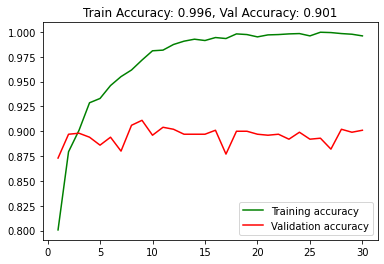

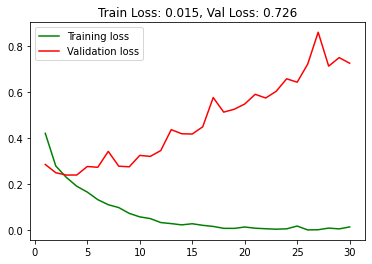

In [43]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'g', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Train Accuracy: %.3f, Val Accuracy: %.3f' % (acc[-1], val_acc[-1]), fontsize=12)
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Train Loss: %.3f, Val Loss: %.3f' % (loss[-1], val_loss[-1]), fontsize=12)
plt.legend()

plt.show()

In [44]:
#####################################################################
#SECOND  APPROACH 
 #VGG16 Pre-trained CNN model as a Feature Extractor with data augmentation ****************
 #TRAINING ACCURACY :0.88
 #VALIDATION ACCURACY:0.99  
 #CONCLUSION: MODEL UNDER FITTED
#####################################################################

In [45]:
train_datagen = ImageDataGenerator(rescale=1./255, zoom_range=0.3, rotation_range=50,
                                   width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, 
                                   horizontal_flip=True, fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow(train_imgs, train_labels_enc, batch_size=30)
val_generator = val_datagen.flow(validation_imgs, validation_labels_enc, batch_size=20)

In [46]:

from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from keras.models import Sequential
from keras import optimizers

model = Sequential()
model.add(vgg_model)
model.add(Dense(512, activation='relu', input_dim=input_shape))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['accuracy'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
functional_3 (Functional)    (None, 8192)              14714688  
_________________________________________________________________
dense_12 (Dense)             (None, 512)               4194816   
_________________________________________________________________
dropout_8 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_9 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 513       
Total params: 19,172,673
Trainable params: 4,457,985
Non-trainable params: 14,714,688
__________________________________

In [47]:
history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=100,
                              validation_data=val_generator, validation_steps=50, verbose=1)

Epoch 1/100
100/100 [==============================] - 27s 267ms/step - loss: 0.6601 - accuracy: 0.6057 - val_loss: 0.5013 - val_accuracy: 0.8240
Epoch 2/100
100/100 [==============================] - 27s 266ms/step - loss: 0.5668 - accuracy: 0.7010 - val_loss: 0.4121 - val_accuracy: 0.8370
Epoch 3/100
100/100 [==============================] - 27s 266ms/step - loss: 0.5172 - accuracy: 0.7520 - val_loss: 0.3658 - val_accuracy: 0.8500
Epoch 4/100
100/100 [==============================] - 27s 267ms/step - loss: 0.4717 - accuracy: 0.7740 - val_loss: 0.3339 - val_accuracy: 0.8620
Epoch 5/100
100/100 [==============================] - 26s 262ms/step - loss: 0.4506 - accuracy: 0.7933 - val_loss: 0.3134 - val_accuracy: 0.8690
Epoch 6/100
100/100 [==============================] - 26s 264ms/step - loss: 0.4294 - accuracy: 0.8020 - val_loss: 0.3036 - val_accuracy: 0.8670
Epoch 7/100
100/100 [==============================] - 26s 264ms/step - loss: 0.4151 - accuracy: 0.8033 - val_loss: 0.2946 -

In [48]:
model.save('/content/drive/My Drive/Colab Notebooks/cats_dogs_tlearn_vgg_16_pretrained_img_aug_cnn.h5')

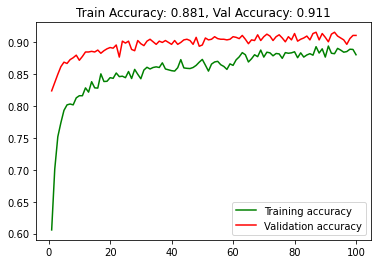

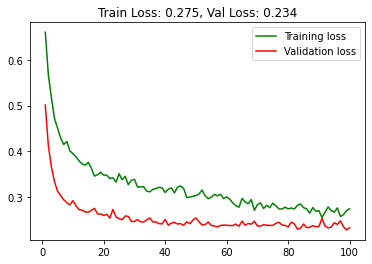

In [49]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'g', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Train Accuracy: %.3f, Val Accuracy: %.3f' % (acc[-1], val_acc[-1]), fontsize=12)
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Train Loss: %.3f, Val Loss: %.3f' % (loss[-1], val_loss[-1]), fontsize=12)
plt.legend()

plt.show()

In [50]:
#####################################################################
#THIRD  APPROACH 
 #VGG16 Pre-trained CNN model with Fine-tuning and Image Augmentation
 #TRAINING ACCURACY :0.99
 #VALIDATION ACCURACY:0.95 
 #CONCLUSION: MODEL IS PERFECT
#####################################################################


In [51]:
#We will now leverage our VGG-16 model object stored in the vgg_model variable and unfreeze convolution blocks 4 and 5 while keeping the first three blocks frozen


In [52]:
vgg_model.trainable = True

set_trainable = False
for layer in vgg_model.layers:
    if layer.name in ['block5_conv1', 'block4_conv1']:
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False
        
print("Trainable layers:", vgg_model.trainable_weights)


Trainable layers: [<tf.Variable 'block4_conv1/kernel:0' shape=(3, 3, 256, 512) dtype=float32, numpy=
array([[[[-1.24538150e-02,  8.40655994e-03, -5.28845051e-03, ...,
          -2.04581907e-03, -3.92359449e-03,  1.30683812e-03],
         [ 1.15566896e-02,  2.46055960e-03, -4.09082584e-02, ...,
          -4.92062652e-03, -1.63423386e-03,  8.94230697e-03],
         [-1.43469922e-04, -5.65873180e-03,  1.84066985e-02, ...,
          -2.08840682e-03,  2.63321817e-06, -2.50728261e-02],
         ...,
         [ 1.37888230e-02, -6.58180192e-03,  9.65370331e-03, ...,
           7.17610447e-03,  3.45725450e-03,  5.33173978e-03],
         [ 2.65833316e-03,  7.77704641e-04,  2.86239345e-04, ...,
          -5.40583069e-03,  8.93119723e-03,  1.40043022e-02],
         [-8.53933115e-03,  1.43394794e-03, -2.91879033e-03, ...,
           3.77660524e-03,  2.05454584e-02, -1.35868033e-02]],

        [[-1.20176468e-02,  1.51250837e-03,  3.43130133e-03, ...,
          -1.57830697e-02, -2.39501009e-03,  2.93

In [53]:
layers = [(layer, layer.name, layer.trainable) for layer in vgg_model.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

,Layer Type,Layer Name,Layer Trainable
0,<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7fed7414b0b8>,input_3,False
1,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fed7414b2b0>,block1_conv1,False
2,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fed7414b5f8>,block1_conv2,False
3,<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7fed4399d860>,block1_pool,False
4,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fed3c28d5f8>,block2_conv1,False
5,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fed74256400>,block2_conv2,False
6,<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7fed74256828>,block2_pool,False
7,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fed439f5080>,block3_conv1,False
8,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fed439f5e10>,block3_conv2,False
9,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fed439fa198>,block3_conv3,False


In [54]:
#DATA AUGMENTATION 

train_datagen = ImageDataGenerator(rescale=1./255, zoom_range=0.3, rotation_range=50,
                                   width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, 
                                   horizontal_flip=True, fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow(train_imgs, train_labels_enc, batch_size=30)
val_generator = val_datagen.flow(validation_imgs, validation_labels_enc, batch_size=20)

In [55]:

from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from keras.models import Sequential
from keras import optimizers

model = Sequential()
model.add(vgg_model)
model.add(Dense(512, activation='relu', input_dim=input_shape))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['accuracy'])

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
functional_3 (Functional)    (None, 8192)              14714688  
_________________________________________________________________
dense_15 (Dense)             (None, 512)               4194816   
_________________________________________________________________
dropout_10 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_11 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 513       
Total params: 19,172,673
Trainable params: 17,437,185
Non-trainable params: 1,735,488
__________________________________

In [56]:
history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=100,
                              validation_data=val_generator, validation_steps=50, verbose=1)

Epoch 1/100
100/100 [==============================] - 30s 297ms/step - loss: 0.5860 - accuracy: 0.6757 - val_loss: 0.3089 - val_accuracy: 0.8780
Epoch 2/100
100/100 [==============================] - 29s 294ms/step - loss: 0.3990 - accuracy: 0.8177 - val_loss: 0.2116 - val_accuracy: 0.9190
Epoch 3/100
100/100 [==============================] - 29s 295ms/step - loss: 0.3269 - accuracy: 0.8567 - val_loss: 0.3457 - val_accuracy: 0.8590
Epoch 4/100
100/100 [==============================] - 30s 296ms/step - loss: 0.2871 - accuracy: 0.8787 - val_loss: 0.1920 - val_accuracy: 0.9320
Epoch 5/100
100/100 [==============================] - 30s 298ms/step - loss: 0.2649 - accuracy: 0.8923 - val_loss: 0.1621 - val_accuracy: 0.9440
Epoch 6/100
100/100 [==============================] - 30s 298ms/step - loss: 0.2353 - accuracy: 0.8997 - val_loss: 0.1494 - val_accuracy: 0.9430
Epoch 7/100
100/100 [==============================] - 30s 296ms/step - loss: 0.2173 - accuracy: 0.9130 - val_loss: 0.1342 -

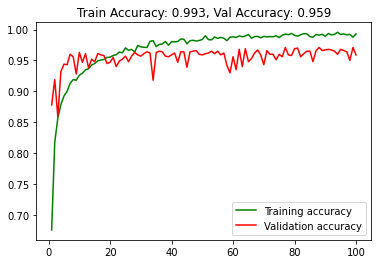

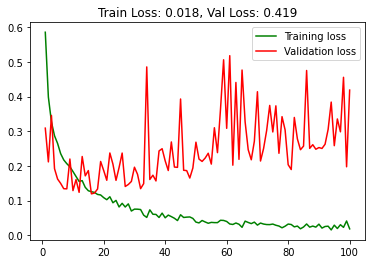

In [57]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'g', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Train Accuracy: %.3f, Val Accuracy: %.3f' % (acc[-1], val_acc[-1]), fontsize=12)
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Train Loss: %.3f, Val Loss: %.3f' % (loss[-1], val_loss[-1]), fontsize=12)
plt.legend()

plt.show()

In [58]:
model.save('/content/drive/My Drive/Colab Notebooks/cats_dogs_tlearn_vgg_16_finetuned_img_aug_cnn.h5')